This notebook contains information about analysis on the given dataset for airline services.

Author : Umidjon Sattorov. Student at Mohirdev platform.

In [1]:
#Importing essential modules and packages
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#chi2_contingency function for building cramers_v function
from scipy.stats import chi2_contingency

In [2]:
analysis_data = pd.read_csv(filepath_or_buffer = './data/analysis_ready_dataset.csv', sep = ',')
analysis_data.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK,Bangalore,Early_Morning,1,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG,Hyderabad,Evening,0,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK,Bangalore,Morning,1,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK,Kolkata,Morning,1,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E,Chennai,Early_Morning,0,Morning,Mumbai,Economy,2.00,4,10712
5,Air_India,AI,Delhi,Afternoon,1,Morning,Chennai,Business,20.42,5,45257
6,Vistara,UK,Chennai,Evening,1,Morning,Mumbai,Economy,18.42,20,5054
7,Air_India,AI,Bangalore,Morning,0,Afternoon,Delhi,Business,2.58,30,32923
8,Vistara,UK,Bangalore,Early_Morning,1,Night,Hyderabad,Economy,15.92,12,11383
9,Air_India,AI,Chennai,Night,1,Afternoon,Mumbai,Economy,16.50,18,4357


In [28]:
#Checking the type of the data for each column
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  int64  
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


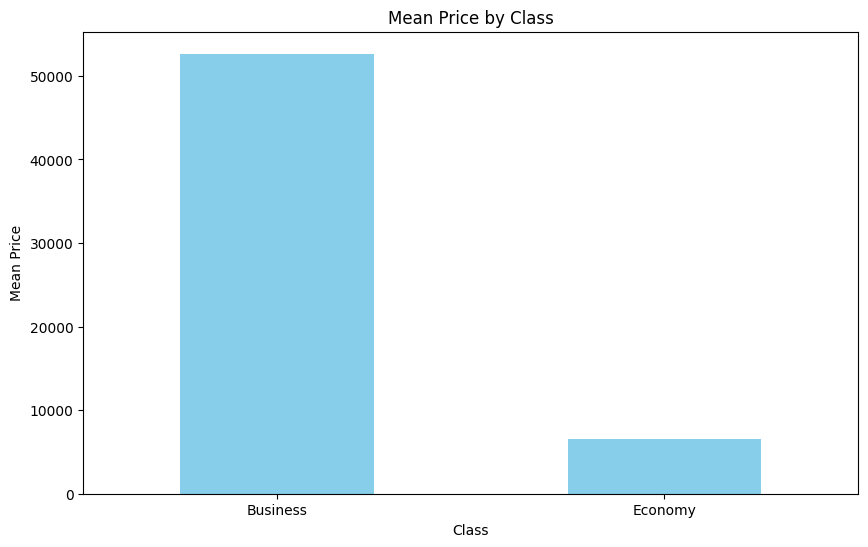

In [4]:
#Average cost of flight for each class category
mean_prices = analysis_data.groupby('class')['price'].mean()

plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Price by Class')
plt.xlabel('Class')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.show()

The cost of business class flight is far higher than economy class flight. That is understandable and logical.

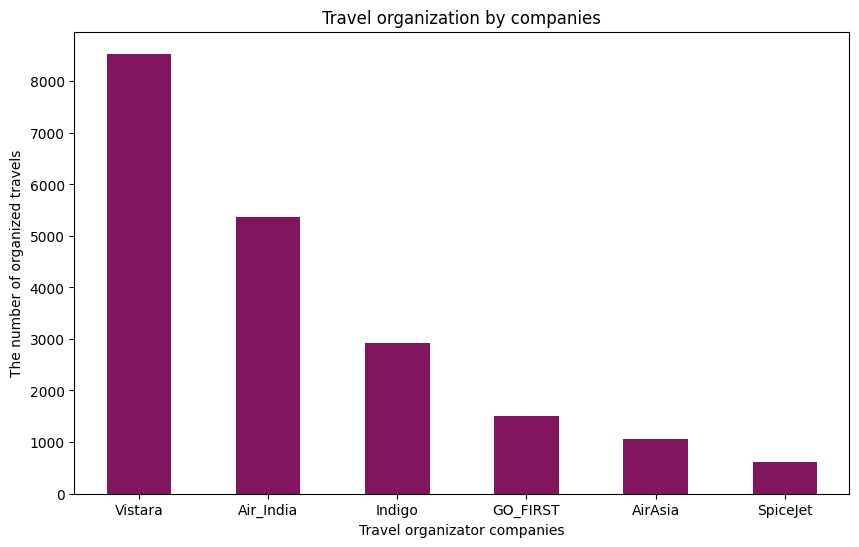

In [12]:
#Checking which company organized flights most compared to other companies
airline_companies = analysis_data['airline'].value_counts()

plt.figure(figsize=(10, 6))
airline_companies.plot(kind='bar', color='#81165F')
plt.title('Travel organization by companies')
plt.xlabel('Travel organizator companies')
plt.ylabel('The number of organized travels')
plt.xticks(rotation=0)
plt.show()

From the graph above, we can easily infer that Vistara was the company which organized travels most compared to other companies while Spicejet indicated the least number of organizations.

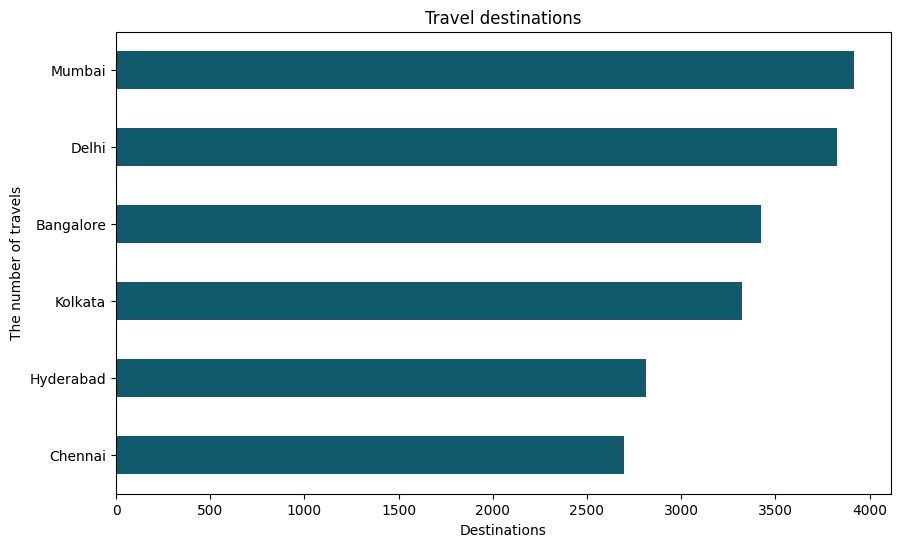

In [19]:
#Cities which airline travels are organized
destinations = analysis_data['destination_city'].value_counts()
destinations = destinations.sort_values()

plt.figure(figsize=(10, 6))
destinations.plot(kind='barh', color='#115A6E')
plt.title('Travel destinations')
plt.xlabel('Destinations')
plt.ylabel('The number of travels')
plt.xticks(rotation=0)
plt.show()

From the bar graph above, I can definately say that most people traveled to Mumbai compared to other cities.

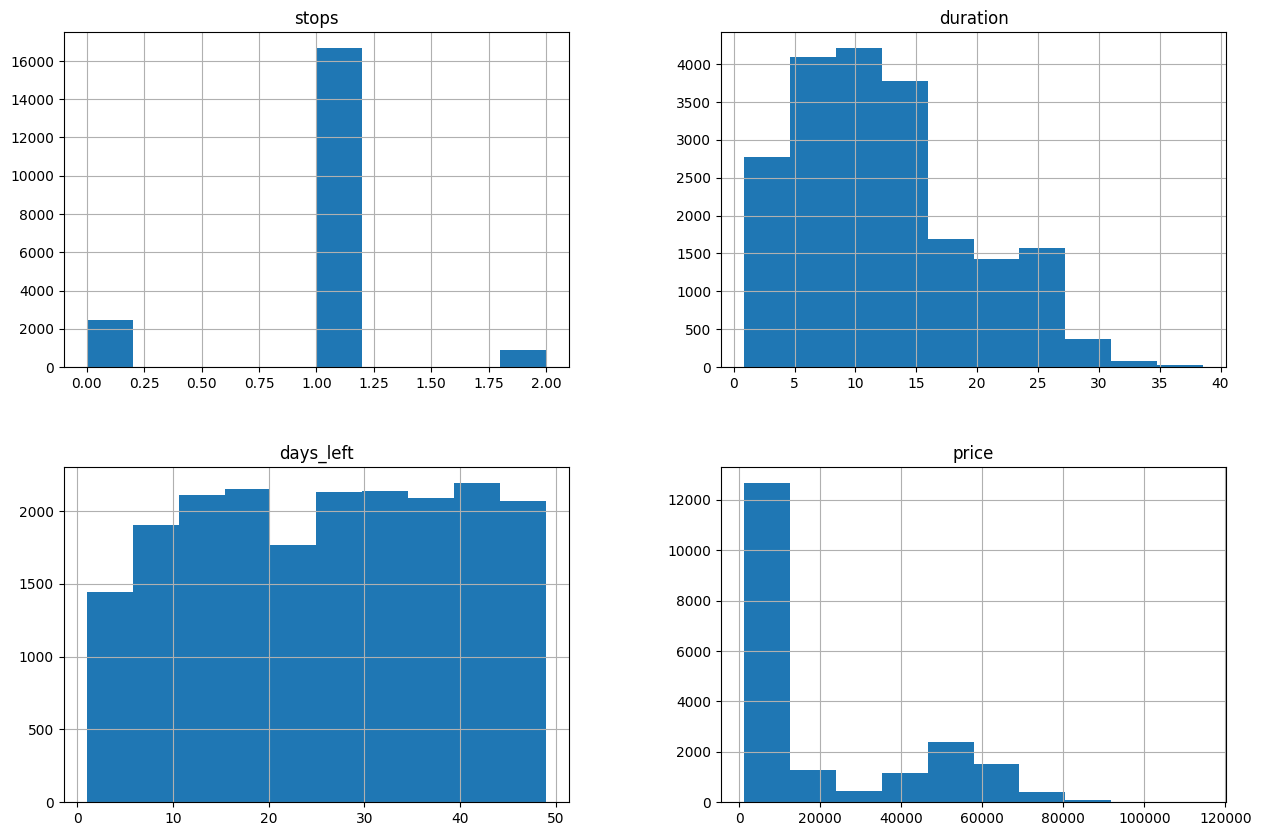

In [7]:
#Distribution of the data in numerical features
analysis_data.hist(figsize=(15, 10))
plt.show()

The distribution of numerical data indicate that higher percentage of flights stopped while commutation. Only slight number of airplanes didn't stop or stopped more than one during the flight. 

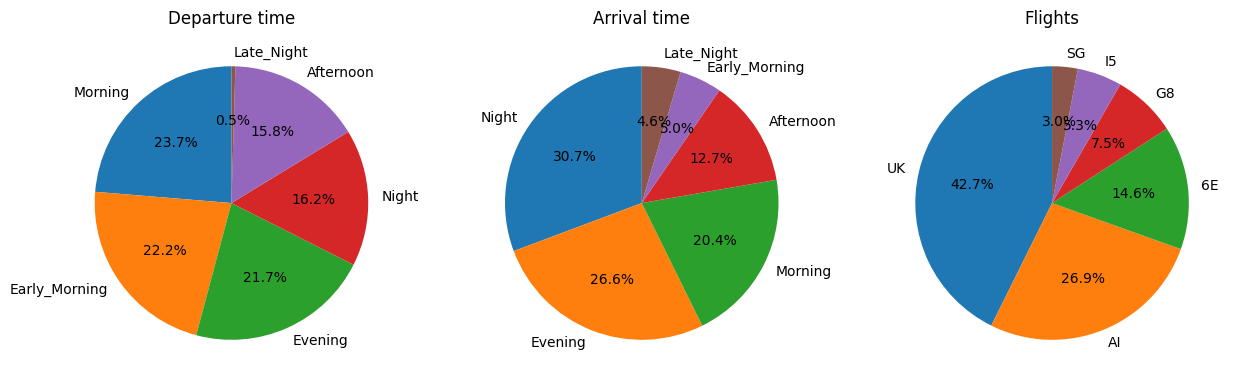

In [25]:
#Departure time and arrival time data distribution
dept_time = analysis_data['departure_time'].value_counts()
arr_time = analysis_data['arrival_time'].value_counts()
flights = analysis_data['flight'].value_counts()

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axs[0].pie(dept_time, labels = dept_time.index, autopct = '%1.1f%%', startangle = 90)
axs[0].set_title('Departure time')
axs[1].pie(arr_time, labels = arr_time.index, autopct = '%1.1f%%', startangle = 90)
axs[1].set_title('Arrival time')
axs[2].pie(flights, labels = flights.index, autopct = '%1.1f%%', startangle = 90)
axs[2].set_title('Flights')
plt.show()

From the pie chart above, we can infer that most flights started in the morning and ended at night. Moreover we can ultimately say that most flights are accomplished by United Kingdom companies.

### Lastly in this analysis notebook, I am going to check the correlation of features using the cramers V technique.

In [4]:
numerical_features = analysis_data.select_dtypes(include=['number'])
categorical_features = analysis_data.select_dtypes(include=['object'])

#Building correlation matrix for categorical features
label = LabelEncoder()
data_encoded = pd.DataFrame()
for i in categorical_features : 
    data_encoded[i] = label.fit_transform(analysis_data[i])

for col in numerical_features:
    data_encoded[col] = numerical_features[col]
data_encoded.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,stops,duration,days_left,price
0,5,5,0,1,5,5,1,1,14.25,21,7212
1,4,4,3,2,5,4,1,0,1.75,7,5292
2,5,5,0,4,2,2,0,1,9.58,5,60553
3,5,5,4,4,2,3,1,1,6.75,28,5760
4,3,0,1,1,4,5,1,0,2.00,4,10712


In [35]:
#Cramers_v function
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1 
  return np.sqrt(stat/(obs*mini))

In [36]:
#Building the matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2)) 
  rows.append(col)
  
cramers_results = np.array(rows)
cramer_matrix = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
cramer_matrix

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,stops,duration,days_left,price
airline,1.00,1.00,0.06,0.08,0.15,0.06,0.45,0.18,0.35,0.07,0.88
flight,1.00,1.00,0.06,0.08,0.15,0.06,0.45,0.18,0.35,0.07,0.88
source_city,0.06,0.06,1.00,0.08,0.05,0.21,0.04,0.07,0.32,0.05,0.96
departure_time,0.08,0.08,0.08,1.00,0.15,0.04,0.07,0.08,0.36,0.05,0.59
arrival_time,0.15,0.15,0.05,0.15,1.00,0.12,0.12,0.06,0.36,0.05,0.61
destination_city,0.06,0.06,0.21,0.04,0.12,1.00,0.04,0.11,0.32,0.05,0.93
class,0.45,0.45,0.04,0.07,0.12,0.04,1.00,0.13,0.26,0.05,1.00
stops,0.18,0.18,0.07,0.08,0.06,0.11,0.13,1.00,0.74,0.05,0.88
duration,0.35,0.35,0.32,0.36,0.36,0.32,0.26,0.74,1.00,0.14,0.61
days_left,0.07,0.07,0.05,0.05,0.05,0.05,0.05,0.05,0.14,1.00,0.50


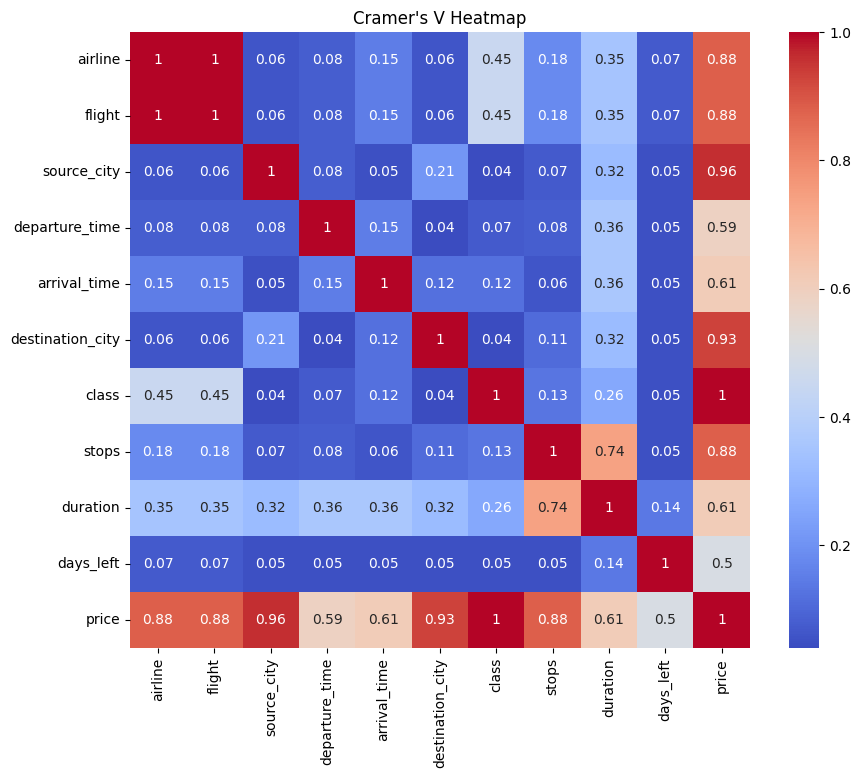

In [37]:
# Plotting the heatmap of cramers_v
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Cramer\'s V Heatmap')
plt.show()

Wow it seems like there is great correlation between our target column and other columns, this would end up with otustanding machine learning model. However we have highly correlated features like flight and airline. I think, I have to remove one feature from my dataset, otherwise it can lead to overtrain or multicolliniarity problem in our regression model. For that reason, I am going to remove the column airline from my dataset. 

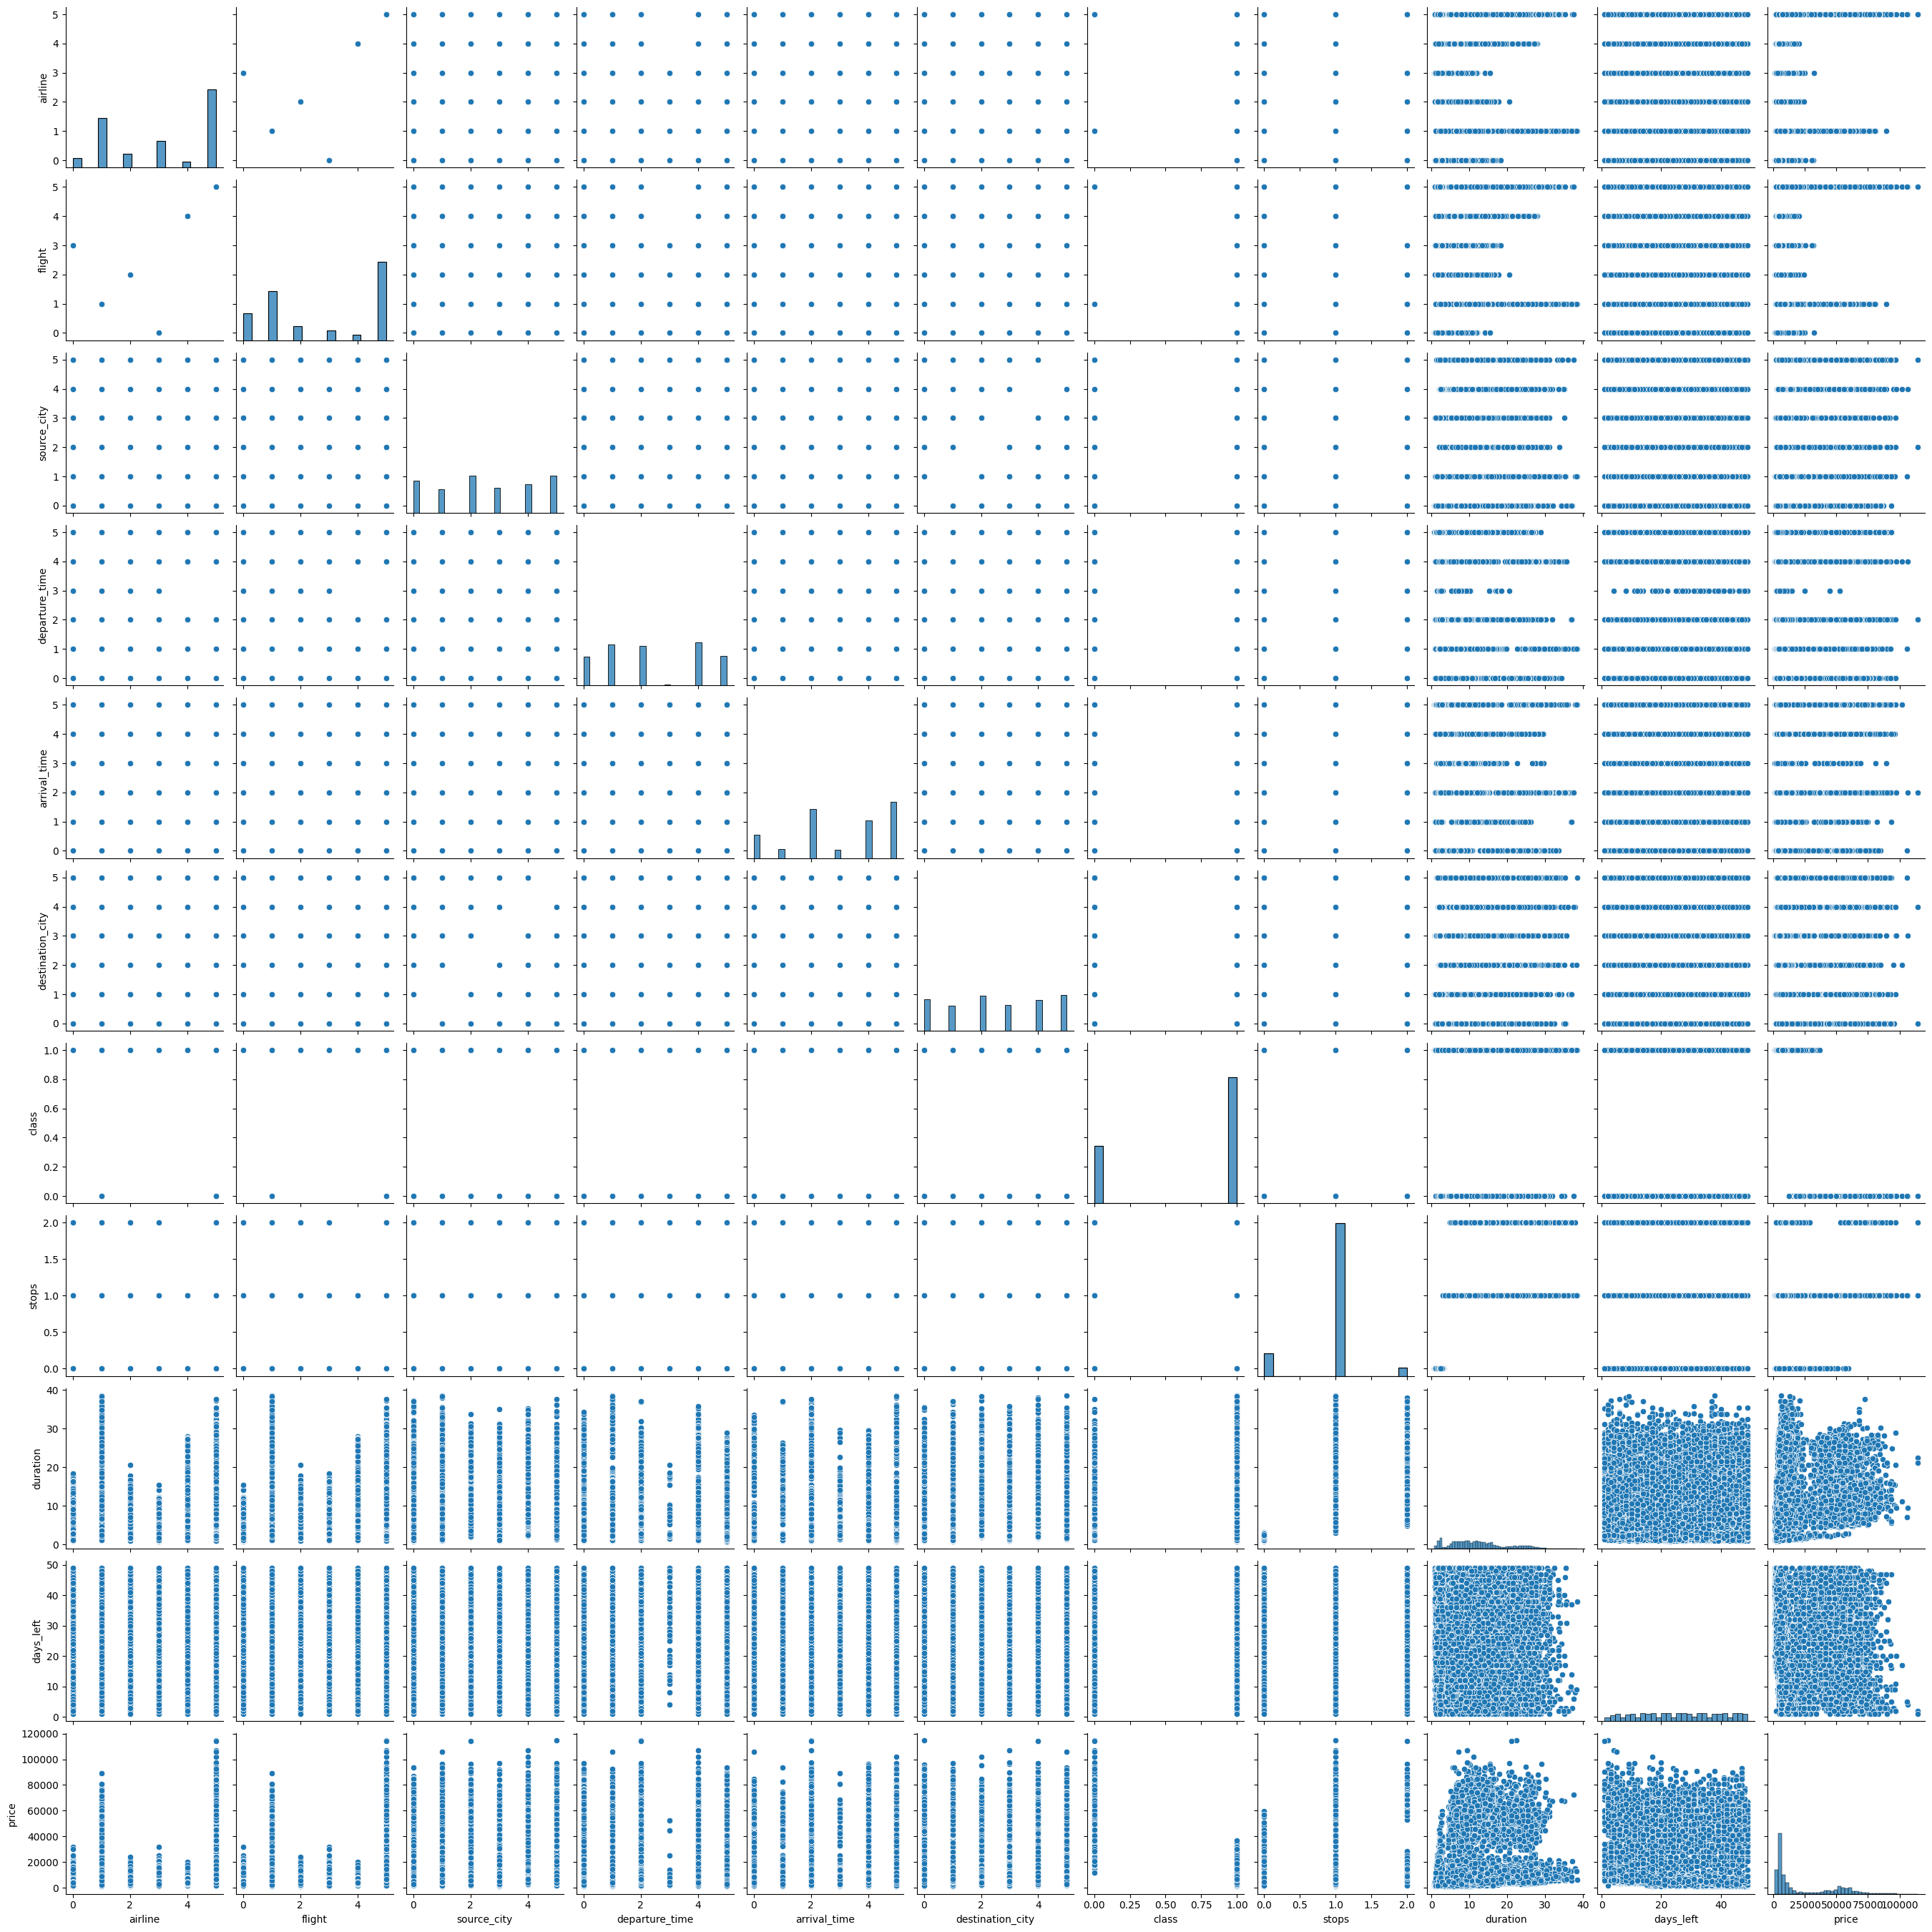

In [6]:
sns.pairplot(data = data_encoded)
plt.show()